<a href="https://colab.research.google.com/github/zal-developer/Time_Series_Cores/blob/main/Resampling_Datetime_Data_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [ ]:
#loading the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


1.)  Convert the date column to datetime dtype.


In [ ]:
#converting date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [ ]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(9)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03


2. ) Set the date column as the index.

In [ ]:
#setting date column as index of df
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
date,,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020-12-27
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020-12-28
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020-12-29


In [ ]:
#showing index content
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

3.)  Filter out only the required data:

Keep only data from the year 2000 or later.

Keep only the following features:

precipitation,
mean_temp,
min_temp,
max_temp,
snow_depth

In [ ]:
#filtering needed data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp',
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


4. ) Impute any missing values.

Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [ ]:
#checking for null values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

 Forward fill,because precipitation and snow_depth tend to increase  over time.

In [ ]:
#forward filling
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [ ]:
#forward filling
df['precipitation'] = df['precipitation'].fillna(method='ffill')

Interpolation, because they depend on other weather features such as precipitation

In [ ]:
#temperature features - interpolation
df[['mean_temp', 'min_temp', 'max_temp']] = df[['mean_temp', 'min_temp', 'max_temp']].interpolate()

In [ ]:
#confirming if  null values are filled
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64



---



Q1 Visualization Requirements

Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
Create a wide figure (e.g. figsize=(12,3))

With the title "Precipitation for 2000-2010"

With a ylabel of "Inches"

Customize the major xaxis ticks to:

Have major xaxis ticks every 1 year.

Use 4-digit years for the labels

Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:

Have minor xaxis ticks every 3 months

Do not label the minor ticks.


In [ ]:
#showing precipitation df
precip_cols = ['precipitation']
plot_df  = df.loc["2000":,precip_cols]
plot_df

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2020-12-27,2.0
2020-12-28,0.2
2020-12-29,0.0


<Axes: xlabel='date'>

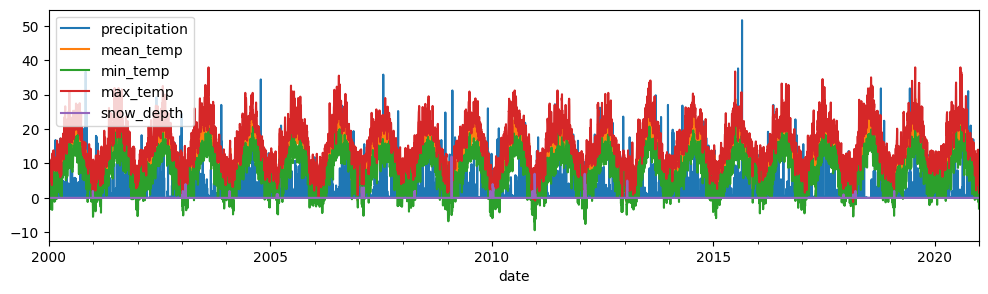

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

In [ ]:
import datetime

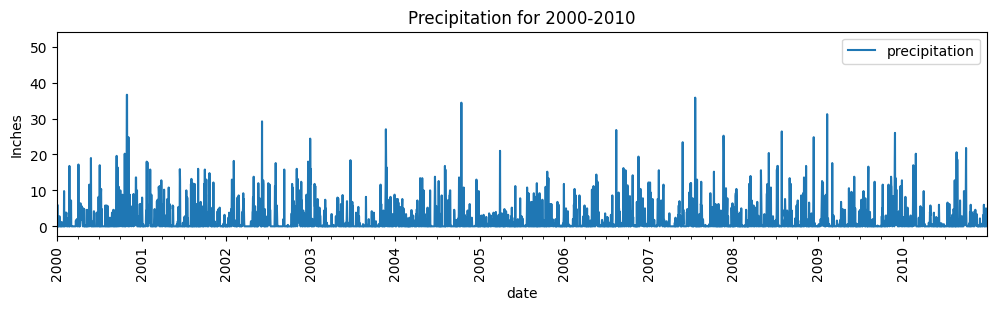

In [ ]:
ax = plot_df.plot(figsize=(12,3))
ax.set( title= "Precipitation for 2000-2010",
      ylabel='Inches')

# customize major ticks
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)
##Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()
# Set the x-axis limits
ax.set_xlim(mdates.date2num(datetime.datetime(2000, 1, 1)), mdates.date2num(datetime.datetime(2010, 12, 31)))
fig.autofmt_xdate(rotation=90,ha='center')


Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method


In [ ]:
# Resample to monthly frequency and calculate total precipitation
monthly_precipitation = df['precipitation'].resample('M').sum()
monthly_precipitation

date
2000-01-31     14.3
2000-02-29     62.2
2000-03-31     13.6
2000-04-30     74.2
2000-05-31     68.6
              ...  
2020-08-31     45.2
2020-09-30     19.2
2020-10-31    146.4
2020-11-30     52.6
2020-12-31     61.8
Freq: M, Name: precipitation, Length: 252, dtype: float64

Find the date and corresponding value for the max precipitation.

In [ ]:
#highest prescription level
max_precipitation = monthly_precipitation.max()
max_precipitation

166.4

In [ ]:
#date of highest prescription level
max_date = monthly_precipitation.idxmax()
max_date

Timestamp('2000-10-31 00:00:00')

Plot the feature and time period that corresponds to the question

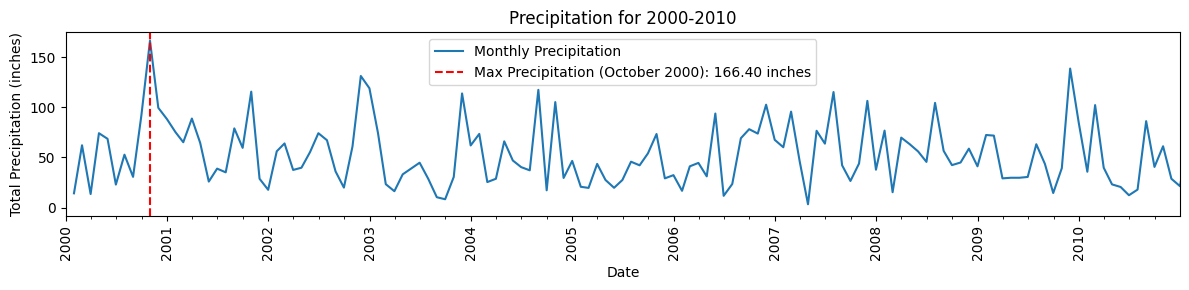

In [ ]:
# Create a wide figure
plt.figure(figsize=(12, 3))

# Plot the data
plt.plot(monthly_precipitation.index, monthly_precipitation, label='Monthly Precipitation')
plt.axvline(max_date, color='red', linestyle='--', label=f'Max Precipitation ({max_date.strftime("%B %Y")}): {max_precipitation:.2f} inches')

# Customize x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
plt.gca().tick_params(axis='x', rotation=90)
# Set x-axis limits to show only 2000-2010
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-12-31'))

#Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Precipitation (inches)')
plt.title('Precipitation for 2000-2010')
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()




---



Q2 Visualization Requirements

Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

Create a wide figure (e.g. figsize=(12,3))

With the title "Average Temperature"

With a ylabel of "Degrees"

Customize the major xaxis ticks to:

Have major xaxis ticks every 5 years.

Use 4-digit years for the labels

Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:

Have minor xaxis ticks every 1 year

Do not label the minor ticks.

Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.

In [ ]:
# Resample to monthly frequency and calculate total precipitation
yearly_mean_temp = df['mean_temp'].resample('Y').mean()
yearly_mean_temp

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
2005-12-31    11.822877
2006-12-31    12.290822
2007-12-31    11.944384
2008-12-31    11.326776
2009-12-31    11.721644
2010-12-31    10.657397
2011-12-31    12.366438
2012-12-31    11.300956
2013-12-31    11.166301
2014-12-31    12.658904
2015-12-31    12.123699
2016-12-31    11.906284
2017-12-31    12.242466
2018-12-31    12.501370
2019-12-31    12.206164
2020-12-31    12.723634
Freq: A-DEC, Name: mean_temp, dtype: float64

Determine the year and value for the lowest mean temp.


In [ ]:
# Find the minimum mean temperature value and corresponding year
min_mean_temp = yearly_mean_temp.min()
min_mean_temp

10.657397260273973

In [ ]:
#year with lowest mean_temp
min_year = yearly_mean_temp.idxmin().year
min_year

2010

Plot the feature and time period that corresponds to the question

Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

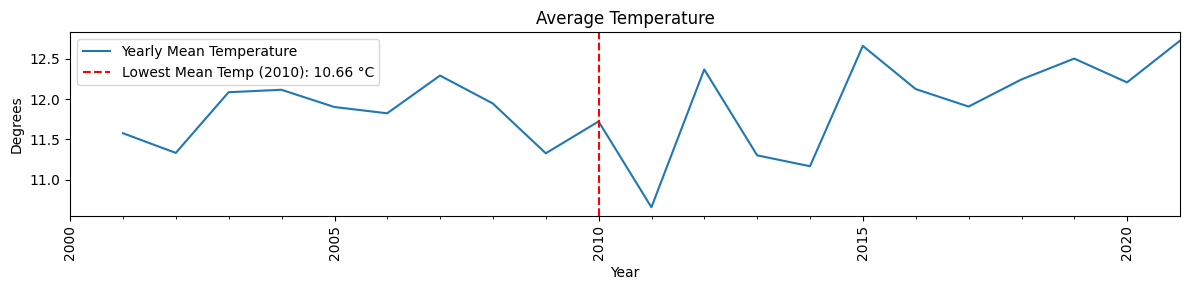

In [ ]:
# Create a wide figure
plt.figure(figsize=(12, 3))

# Plot the data
plt.plot(yearly_mean_temp.index, yearly_mean_temp, label='Yearly Mean Temperature')
plt.axvline(pd.Timestamp(f'{min_year}-01-01'), color='red', linestyle='--', label=f'Lowest Mean Temp ({min_year}): {min_mean_temp:.2f} °C')

# Customize x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.YearLocator())
plt.gca().tick_params(axis='x', rotation=90)

# Set x-axis limits to show only 2000-2020
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Degrees')
plt.title('Average Temperature')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
